<a href="https://colab.research.google.com/github/Elinasu001/Data-Analysis-with-Open-Source/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,957 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


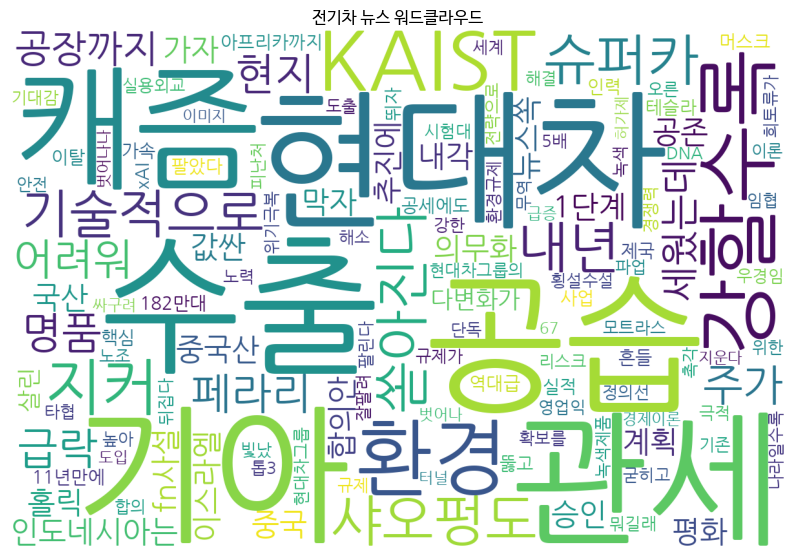

Counter({'긍정': 8, '중립': 7, '부정': 5})


In [4]:
!apt-get -y install fonts-nanum
!pip -q install wordcloud pandas matplotlib

import re, pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1) 제목 리스트
titles = [
"‘지커·샤오펑도 韓 공습’⋯ “내년, 中 전기차 쏟아진다”",
"“전기차 슈퍼카 기술적으로 어려워”…명품車 페라리 주가 급락",
"현대차 현지 공장까지 세웠는데…인도네시아는 값싼 중국 전기차 ‘홀릭’",
"'중국산 전기차 공습 막자'...'국산 의무화' 추진에 기대·우려 '공존'",
"이스라엘 내각, 가자 평화 계획 1단계 합의안 승인[뉴스쏙:속]",
"[fn사설] 시장 다변화가 살린 수출, 아프리카까지 뛰자",
"현대차·기아, 관세 뚫고 3분기 182만대 팔았다… 11년만에 최대",
"기아, 또 역대급 실적…美 관세·中 공세에도 판매 성장",
"머스크 사업 제국 '흔들'…테슬라·xAI 핵심 인력 이탈 가속",
"현대차그룹의 전기차 안전 확보를 위한 노력",
"[횡설수설/우경임]희토류가 뭐길래",
"시험대 오른 韓 실용외교… 美와 ‘극적 타협’ 도출 촉각",
"[단독] '파업' 모트라스 임협 합의…현대차그룹 '노조 리스크' 해결",
"세계 톱3 굳히고 영업익 5배 ↑… 정의선 위기극복 DNA 빛났",
"9월 글로벌 전기차 판매 역대 최대… 캐즘 해소 기대감",
"KAIST “환경 규제 강한 나라일수록 전기차 경쟁력 높아”",
"“환경 규제가 강할수록 전기차 더 잘 팔린다”... KAIST, ‘녹색 피난처’ 전략으로 글로벌 무역 이론 뒤집다",
"전기차, 환경규제 강할수록 잘팔려…'녹색제품, 기존 경제이론 벗어나'",
"'싸구려 전기차' 이미지 지운다…中, 수출 허가제 도입",
"7월 전기차 판매 67% 급증…'캐즘 터널' 벗어나나",
]

# 2) 토큰화 + 불용어
def tokenize_korean(text):
    return re.findall(r"[가-힣A-Za-z0-9]{2,}", text)

stop = set("전기차 글로벌 국내 해외 올해 최근 3분기 7월 9월 美 中 韓 뉴스 기사 보도 판매 성장 최대 역대 시장 기대 우려".split())

freq = Counter()
for t in titles:
    for tok in tokenize_korean(t):
        if tok not in stop and len(tok)>=2:
            freq[tok]+=1

# 3) 워드클라우드
wc = WordCloud(width=1200, height=800, background_color="white",
               font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")
wc_img = wc.generate_from_frequencies(dict(freq))
plt.figure(figsize=(10,8)); plt.imshow(wc_img); plt.axis('off'); plt.title("전기차 뉴스 워드클라우드"); plt.show()

# 4) 감성(룰 기반)
pos = set("역대급 최대 성장 개선 강세 수출 증가 급증 기대 기대감 돌파 확장 확대 굳히고 해결 높아 잘팔려 경쟁력 상승 호황".split())
neg = set("공습 급락 흔들 이탈 공세 리스크 파업 막자 우려 어려워 허가제 제한 규제 불확실 붕괴 침체 역풍 둔화 감소".split())

def score(t):
    s=0
    for w in tokenize_korean(t):
        if w in pos: s+=1
        if w in neg: s-=1
    return "긍정" if s>0 else ("부정" if s<0 else "중립")

sent = [score(t) for t in titles]
from collections import Counter
print(Counter(sent))
